In [49]:
import import_ipynb



In [53]:
import sys

sys.path.insert(0, '../../code/Helpers')

from Helpers import calculation_functions

ModuleNotFoundError: No module named 'Helpers'

In [39]:
# This is an example of using the stuff
calculation_functions.Mean([0,1,2])

NameError: name 'calculation_functions' is not defined

### 1. Auftrag auslenkungen messen

In [5]:
import os
import numpy as np

#### Niklas
M_1 = 200+(400+50+10+2)# g
l_1 = 54 # cm
# Messunsicherheit bottom/top: 0.005mm
Translation_Of_Scale_Meas_1_Bound_Top, Translation_Of_Scale_Meas_1_Bound_Bottom = np.genfromtxt(os.path.join(os.getcwd(), "translation_of_scale_meas_1.csv"), delimiter=',', skip_header=1, unpack=True)
Translation_Of_Scale_Meas_1 = np.abs(Translation_Of_Scale_Meas_1_Bound_Top - Translation_Of_Scale_Meas_1_Bound_Bottom)
A_meas_1 = Translation_Of_Scale_Meas_1/2
print("Person 1 (Niklas) A measurements: ", A_meas_1)
print("Person 1 (Niklas) A mean: ", np.mean(A_meas_1))
print("Person 1 (Niklas) A standard deviation: ", np.std(A_meas_1))



Person 1 (Niklas) A measurements:  [1.32  1.32  1.305 1.375 1.315 1.325 1.31  1.32  1.31  1.325]
Person 1 (Niklas) A mean:  1.3225000000000002
Person 1 (Niklas) A standard deviation:  0.018607794065928367


In [6]:
#### Dominik
M_2 = 200+(400+50+10+2)# g
l_2 = 54 # cm
# Messunsicherheit bottom/top: 0.005mm
Translation_Of_Scale_Meas_2_Bound_Top, Translation_Of_Scale_Meas_2_Bound_Bottom = np.genfromtxt(os.path.join(os.getcwd(), "translation_of_scale_meas_2.csv"), delimiter=',', skip_header=1, unpack=True)
Translation_Of_Scale_Meas_2 = np.abs(Translation_Of_Scale_Meas_2_Bound_Top - Translation_Of_Scale_Meas_2_Bound_Bottom)
A_meas_2 = Translation_Of_Scale_Meas_2/2
print("Person 2 (Dominik) A measurements: ", A_meas_2)
print("Person 2 (Dominik) A mean: ", np.mean(A_meas_2))
print("Person 2 (Dominik) A standard deviation: ", np.std(A_meas_2))

Person 2 (Dominik) A measurements:  [1.34   1.335  1.3475 1.325  1.35   1.3325 1.3525 1.355  1.3625 1.335 ]
Person 2 (Dominik) A mean:  1.3435
Person 2 (Dominik) A standard deviation:  0.011191514642799608


In [ ]:
# TODO COMPATIBILITY OF THE TWO MEANS/STD's

### 4.

In [27]:
l_4 = 40 # cm

weight_4_without_the_200g, translation_4_bottom, translation_4_top = np.genfromtxt(os.path.join(os.getcwd(), "4_weights_amplitude.csv"), delimiter=',', skip_header=1, unpack=True)
translation_4_meas = np.abs(translation_4_top - translation_4_bottom)
A_4_meas_mm = translation_4_meas/2
weight_m_4_meas_grams = weight_4_without_the_200g + 200 # in grams

#np.max(translation_4_meas)

In [28]:
# Taylor, Barry N.; Thompson, Ambler, eds. (March 2008). The international system of units (SI) (PDF) (Report). National Institute of Standards and Technology. p. 52. NIST special publication 330, 2008 edition.
g = 9.80665 # m/s2

def calc_Z_of_m_grams(m_gr):
    # TODO error propagation of m grams
    return calc_Z_of_m_kg(m_gr / 1000)

# Calculate Force Z in Newton from appended mass in kg.
def calc_Z_of_m_kg(m_kg):
    # TODO error propagation of m kg
    return 2*(g*m_kg)



[0.00014  0.000145 0.000165 0.00017  0.000195 0.000205 0.000245 0.00026
 0.00028  0.00034  0.000385 0.00047  0.000565 0.000705 0.000895 0.00111
 0.001315 0.00148  0.001535 0.00081  0.00053  0.00042  0.00035  0.000305
 0.00026  0.00024  0.000215 0.000185 0.000165 0.00014  0.00015 ]


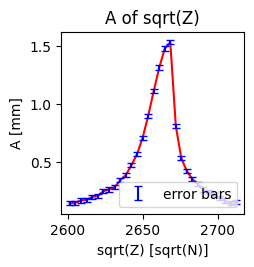

In [33]:
# A
A_values_4_m = A_4_meas_mm / 1000
# sqrt Z
Z_4_values_newton, Z_4_values_newton_error = calc_Z_of_m_grams(weight_m_4_meas_grams, sig_m_grams)# TODO TODO error of m grams
Z_4_sqrt_values = np.sqrt(Z_4_values_newton)
Z_4_sqrt_error = 999999 # TODO

# TODO Graph A(sqrt(Z))
# TODO INCLUDE ERROR BARS FOR A

# TODO Add error for m of 1g
sig_A_values_4_m = np.ones(len(A_values_4_m))*np.std(A_meas_1/1000)
sig_A_values_4_mm = np.ones(len(A_4_meas_mm))*np.std(A_meas_1)

print(A_values_4_m)
# Helper function
import matplotlib.pyplot as plt
def errorbar_plot_A_sqrtZ(A_values, Sqrt_Z_values, sig):
    x, y = Sqrt_Z_values, A_values
    cm = 1/2.54
    fig, ax = plt.subplots(1,1,figsize=(6*cm, 6*cm))
    ax.plot(x,y,linestyle='-', color='red')
    ax.errorbar(x, y, yerr=sig, linestyle='', color='blue', capsize=3, label='error bars')
    ax.set_xlabel('sqrt(Z) [sqrt(N)]')
    ax.set_ylabel('A [mm]')
    ax.set_title('A of sqrt(Z)')
    #ax.set_xlim([-1,1])
    #ax.set_ylim([-4,4])
    ax.legend(loc='lower right')
    plt.show()

errorbar_plot_A_sqrtZ(A_4_meas_mm, Z_4_sqrt_values, sig_A_values_4_mm)


### 5.

Mean a value in mm of the A(sqrt(Z)) values:  0.46370967741935476
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 80
    # data points      = 31
    # variables        = 3
    chi-square         = 7188996.32
    reduced chi-square = 256749.868
    Akaike info crit   = 388.976323
    Bayesian info crit = 393.278284
[[Variables]]
    amplitude:  44.7587334 +/- 2.93561633 (6.56%) (init = 1.6)
    center:     2662.03744 +/- 1.08231600 (0.04%) (init = 2660.897)
    sigma:      14.2905979 +/- 1.08233365 (7.57%) (init = 7.370949)
    fwhm:       33.6517856 +/- 2.54870094 (7.57%) == '2.3548200*sigma'
    height:     1.24950350 +/- 0.08195202 (6.56%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


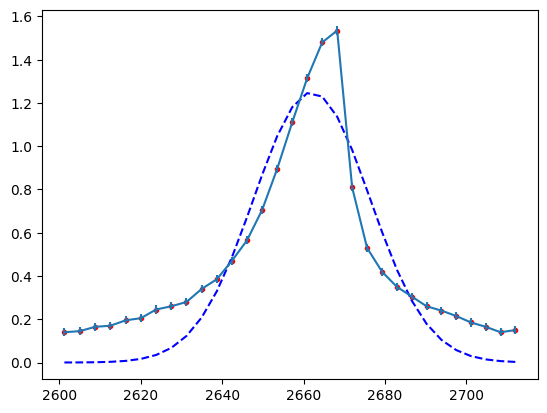

In [62]:
# TODO Mean of the resonance curve
print("Mean a value in mm of the A(sqrt(Z)) values: ", np.mean(A_4_meas_mm))

# TODO FWHM (fit the resonance curve to a gaussian curve)

import numpy as np
from lmfit import Model
from lmfit.models import GaussianModel, ConstantModel
import matplotlib.pyplot as plt

def lmfit_fitting_gaussian(x, y, sig):
    def gaussian_model(x, a):
        x0, std = a[0], a[1]
        return np.exp(-1/2 * ((x-x0)/std)**2)
    w = 1/sig**2 # Or: 1/sig**2
    model = GaussianModel()
    pars = model.guess(y, x=x, amplitude=1.6)#-0.5)
    result = model.fit(y, pars, x=x, weights=w)
    print(result.fit_report())
    plt.plot(x, y, 'ro', ms=3)
    plt.errorbar(x, y, sig)
    plt.plot(x, result.best_fit, 'b--')
# Fit to gaussian
## using def lmfit_fitting_gaussian(x, y, sig):
lmfit_fitting_gaussian(Z_4_sqrt_values, A_4_meas_mm, sig_A_values_4_mm)



In [ ]:
# TODO Calculate sigma from FWHM (see report of lmfit)

### 6. One expects that for 1/3 of the data points the
fit curve does not pass through the error bar. Is
this the case for you? If not, explain why this
is not the case.

### 7.
Check the law (7) for its validity. For various
string lengths l, determine the tensile force Z
for which the string resonates. Graph Z as a
function of l2. Change the length l in steps of
2 cm between 36 and 54 cm.

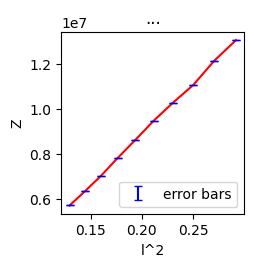

In [63]:
length_7_cm, resonance_mass_7_grams_without200gr = np.genfromtxt(os.path.join(os.getcwd(), "7_lengths_resonanceMass.csv"), delimiter=',', skip_header=1, unpack=True)
mass_7_grams = resonance_mass_7_grams_without200gr + 200

length_7_m = length_7_cm / 100
mass_7_kg = mass_7_grams / 1000
Z_7_kg = calc_Z_of_m_grams(mass_7_grams)

length_7_squared_m = np.square(length_7_m)

sig_Z_7 = np.zeros(len(Z_7_kg))#TODO

# Helper function
import matplotlib.pyplot as plt
def errorbar_plot_Z_of_l_squared(l_squared, Z, sig_Z):
    x, y = l_squared, Z
    sig = sig_Z
    cm = 1/2.54
    fig, ax = plt.subplots(1,1,figsize=(6*cm, 6*cm))
    ax.plot(x,y,linestyle='-', color='red')
    ax.errorbar(x, y, yerr=sig, linestyle='', color='blue', capsize=3, label='error bars')
    ax.set_xlabel('l^2')
    ax.set_ylabel('Z')
    ax.set_title('...')
    #ax.set_xlim([-1,1])
    #ax.set_ylim([-4,4])
    ax.legend(loc='lower right')
    plt.show()

errorbar_plot_Z_of_l_squared(length_7_squared_m, Z_7_kg, sig_Z_7)